##Gether Data

In [ ]:

import numpy as np
import math

L, d_k, d_v = 4, 8, 8                 # L= 4 because we have four words[my name is ikhlas] , and the size of each vector[d_k,d_v] = 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [ ]:

print("Q\n", q)
print("K\n", k)
print("V\n", v)

##Self Attention



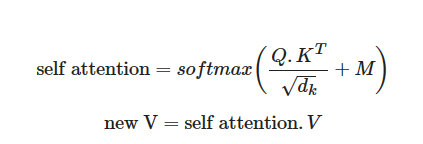

the below 3 blocks are the above formula's calculation/implementation

In [ ]:
np.matmul(q, k.T)       # it means in the above formula how much a query will pay attention to the keys of others [the huge probability will be the more attention's vector]

In [ ]:
# Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()   # just for minimized the variance and stabilized the values of Q.K^T vector

In [ ]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)      #   here is the denomenator part devesiion with the above Q.K^T
q.var(), k.var(), scaled.var()

Notice the reduction in variance of the product

In [ ]:
scaled

##Masking

This is to ensure words don't get context from words generated in the future [Decoder part].
Not required in the encoders, but required int he decoders

In [ ]:
mask = np.tril(np.ones( (L, L) ))
mask    # each word will look to each self and to the previous words not the next words because we do not know the next words in real when we are generating the words.

In [ ]:

mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [ ]:
mask

In [ ]:
scaled + mask

##Softmax

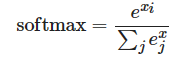

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [ ]:

attention = softmax(scaled + mask).   #if you are working with encoder then you should remove the mask


In [ ]:
attention

In [ ]:
new_v = np.matmul(attention, v)
new_v

In [ ]:
v

##Now all of the above implementation as one Function

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [ ]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)